In [16]:
# importing
import numpy as np
import pandas as pd
from sklearn.datasets import make_spd_matrix
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tqdm import tqdm
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn import metrics
from sklearn.cluster import KMeans




# Assignment #0

In [17]:
# create data set of different number of gaussian groups in different dimension with different means and different covariance matrices. each one should have its own samples and labels

def generate_gaussian_groups(n_groups, n_samples, dim, priors=None, means=None, covs=None):
    if priors is None:
        priors = np.random.dirichlet(np.ones(n_groups))  # Generate random priors if not specified
    assert len(priors) == n_groups, "Number of priors must match the number of groups"
    assert np.isclose(sum(priors), 1), "Priors must sum to 1"

    datasets = []
    for i in range(n_groups):
        if means is not None:
            assert len(means) == n_groups, "Number of means must match the number of groups"
            assert len(means[i]) == dim, "Dimension of means must match the dimension of the data"
            mean = means[i]
        else:
            mean = np.random.uniform(-10, 10, dim)
        if covs is not None:
            assert len(covs) == n_groups, "Number of covariances must match the number of groups"
            assert covs[i].shape == (dim, dim), "Dimension of covariance must match the dimension of the data"
            cov = covs[i]
        else:
            cov = make_spd_matrix(dim)
        samples = int(priors[i] * n_samples)
        data = np.random.multivariate_normal(mean, cov, samples)
        labels = np.full(samples, i)
        df = pd.DataFrame(data, columns=[f'feature_{j}' for j in range(dim)])
        df['label'] = labels
        datasets.append(df)
    # reorder the dataframe with random order
    datasets = pd.concat(datasets).sample(frac=1).reset_index(drop=True) # shuffle rows
    return datasets

def plot_gaussian_groups(datasets):
    fig = plt.figure(figsize=(10,7))
    if len(datasets.shape) == 2:
        ax = fig.add_subplot()
        ax.scatter(datasets['feature_0'], datasets['feature_1'], c=datasets['label'], s=50, cmap='viridis')
        ax.set_xlabel('feature_0')
        ax.set_ylabel('feature_1')
    else:
        ax = fig.add_subplot(projection='3d')
        ax.scatter(datasets['feature_0'], datasets['feature_1'], datasets['feature_2'], c=datasets['label'], s=50, cmap='viridis')
        ax.set_xlabel('feature_0')
        ax.set_ylabel('feature_1')
        ax.set_zlabel('feature_2')
    fig.suptitle('Gaussian Groups (only first features)')
    plt.show()


#### Generate random gaussians

sample data random:
   feature_0  feature_1  label
0   3.759308  -9.371108      3
1   5.653606  -3.797081      2
2  -2.427034   0.023919      1
3  -6.911889   0.000941      1
4   6.299763  -4.497497      2


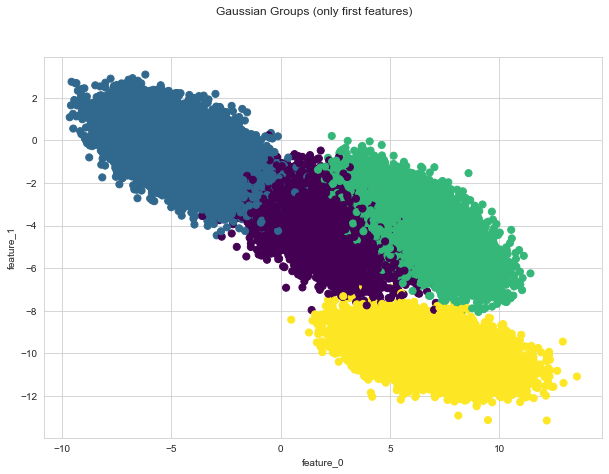

In [22]:
# Example usage:
n_samples = 100000
dim = 2
priors = [.1, .4, .2, .3]
n_groups = len(priors)
dataset_random = generate_gaussian_groups(n_groups, n_samples, dim, priors=priors)

print("sample data random:")
print(dataset_random.head())

# plot each group and color it differently
plot_gaussian_groups(dataset_random)

# Save the DataFrame to a CSV file
dataset_random.to_csv('dataset_random.csv', index=False)


#### Generate square gaussians


sample data random:
   feature_0  feature_1  label
0   2.466314  -9.368629      3
1   9.754207   1.808841      1
2 -10.904562   3.381829      0
3  10.792223   1.943182      1
4   9.106273   3.970100      1


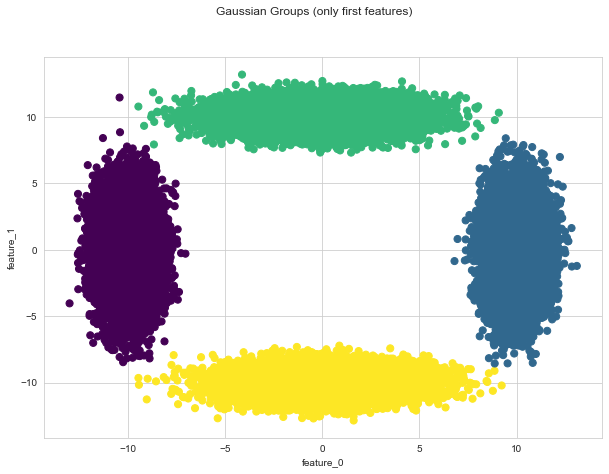

In [4]:
# Example usage:
n_samples = 100000
dim = 2
priors = [.25, .25, .25, .25]
n_groups = len(priors)
dataset_square = generate_gaussian_groups(n_groups, n_samples, dim, priors=priors,
                                   means=[np.array([-10, 0]), np.array([10, 0]), np.array([0, 10]), np.array([0, -10])],
                                   covs=[np.array([[0.5, 0], [0, 5]]), np.array([[0.5, 0], [0, 5]]), np.array([[5, 0], [0, 0.5]]), np.array([[5, 0],[0,.5]])])

print("sample data random:")
print(dataset_square.head())

# plot each group and color it differently
plot_gaussian_groups(dataset_square)

# Save the DataFrame to a CSV file
dataset_square.to_csv('dataset_square.csv', index=False)


#### Generate traingle gaussians


sample data triangle:
   feature_0  feature_1  label
0  13.277082  -1.305236      1
1  -7.102467  -6.901082      0
2   8.539768  -5.615036      1
3   0.518831   5.437602      2
4  12.993419  -1.382247      1


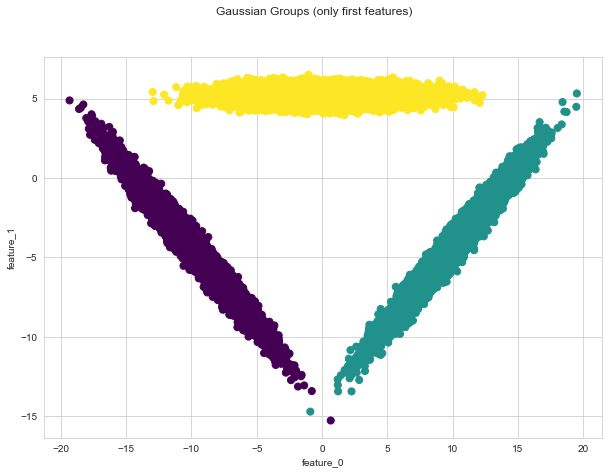

In [5]:
# Triangle
n_samples = 100000
dim = 2
priors = [1/3, 1/3, 1/3]
n_groups = len(priors)
dataset_triangle = generate_gaussian_groups(n_groups, n_samples, dim, priors=priors,
                                   means=[np.array([-10, -np.sqrt(75)/2]), np.array([10, -np.sqrt(75)/2]), np.array([0, 3*np.sqrt(3)])],
                                   covs=[np.array([[ 5.05, -4.95], [-4.95,  5.05]]), np.array([[ 5.05, 4.95], [4.95,  5.05]]), np.array([[10, 0], [0, 0.1]])])

print("sample data triangle:")
print(dataset_triangle.head())

# plot each group and color it differently
plot_gaussian_groups(dataset_triangle)

# Save the DataFrame to a CSV file
dataset_triangle.to_csv('dataset_triangle.csv', index=False)


#### Generate lines gaussians


Sample data lines:
   feature_0  feature_1  label
0  -1.723336   5.727365      3
1   1.902163   1.184703      1
2   2.217264   3.560706      4
3   1.179474   4.292235      4
4   4.501455   1.899680      5


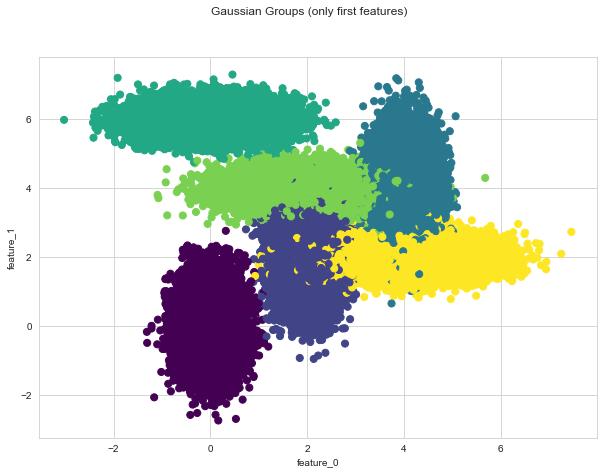

In [6]:
# Two lines with three Gaussians each
n_samples = 100000
dim = 2
priors = [1/6]*6  # Six Gaussians in total
n_groups = len(priors)

# Define the means along two lines
means = [np.array([2*i, 2*i]) for i in range(3)] + [np.array([2*i, 6-2*i]) for i in range(3)]

# Define the covariance matrices
# We can make the clusters more elongated along the lines by making one of the eigenvalues much larger than the other.
covs = [np.array([[0.1, 0], [0, 0.5+i/10]]) for i in range(3)] + [np.array([[0.5+i/10, 0], [0, 0.1]]) for i in range(3)]

# Generate the Gaussian groups
dataset_lines = generate_gaussian_groups(n_groups, n_samples, dim, priors=priors, means=means, covs=covs)

print("Sample data lines:")
print(dataset_lines.head())

# Plot each group and color it differently
plot_gaussian_groups(dataset_lines)

# Save the DataFrame to a CSV file
dataset_lines.to_csv('dataset_lines.csv', index=False)


#### Generate star gaussians

Sample data star:
   feature_0  feature_1  label
0   1.306376   4.692610      1
1  -6.489446   4.540788      2
2   3.870145 -12.171625      4
3   7.488709   0.124124      0
4  -9.485116  -6.528929      3


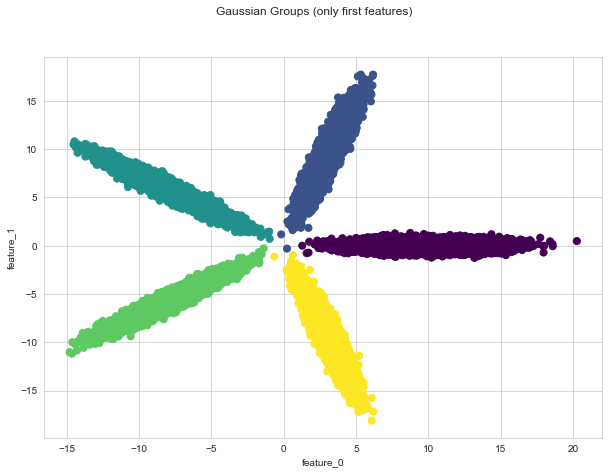

In [7]:
# Star
n_samples = 100000
dim = 2
priors = [0.2, 0.2, 0.2, 0.2, 0.2]
n_groups = len(priors)

# Define the means
means = [np.array([np.cos(2*np.pi*i/5), np.sin(2*np.pi*i/5)])*10 for i in range(5)]

# Define the covariance matrices
# We can use a similar approach to the rotated covariance matrices for the triangle,
# but with different rotation angles for each cluster to align them with the rays of the star.
covs = []
for i in range(5):
    theta = np.radians(i*72+90)  # Rotate each covariance matrix by a different angle
    R = np.array([[np.cos(theta), -np.sin(theta)],
                  [np.sin(theta),  np.cos(theta)]])
    cov = np.array([[0.1, 0], [0, 5]])  # Make the clusters elongated along the rays of the star
    cov_rotated = R @ cov @ R.T
    covs.append(cov_rotated)

# Generate the Gaussian groups
dataset_star = generate_gaussian_groups(n_groups, n_samples, dim, priors=priors, means=means, covs=covs)

print("Sample data star:")
print(dataset_star.head())

# Plot each group and color it differently
plot_gaussian_groups(dataset_star)

# Save the DataFrame to a CSV file
dataset_star.to_csv('dataset_star.csv', index=False)


# Assignment #1

### Creating the algorithm of EM for GMM

In [18]:
class GMM:
    def __init__(self, n_components, n_init=1, init_method='random'):
        self.K = n_components  # Number of Gaussian components
        self.n_init = n_init  # Number of times the algorithm will be run with different initializations
        self.init_method = init_method


    def initialize(self, X, i=1, ):
        n_samples, n_features = X.shape

        if self.init_method == 'kmeans':
            # Initialize means using k-means
            kmeans = KMeans(n_clusters=self.K, random_state=0).fit(dataset[dataset.columns.drop('label')])
            self.mu = kmeans.cluster_centers_
            print(f"Means are initialized with K-Means.")
        elif self.init_method == 'random':
            # Initialize means by randomly choosing data points
            indices = np.random.choice(n_samples, size=self.K, replace=False)
            self.mu = X[indices]
        else:
            raise ValueError(f"Unknown init_method: {self.init_method}")

        # Initialize covariances to be identity matrices
        self.Sigma = np.stack([np.eye(n_features) for _ in range(self.K)])

        # Initialize priors to be uniform probabilities
        self.weights = np.full(self.K, 1 / self.K)

        print(f"Intitialization #{i}: Initialized means, covariances and weights")

    def e_step(self, X):
        n_samples = X.shape[0]

        # Compute the likelihood
        likelihood = np.zeros((n_samples, self.K))
        for i in range(self.K):
            likelihood[:, i] = multivariate_normal.pdf(X, mean=self.mu[i], cov=self.Sigma[i])

        # Compute the responsibilities using Bayes' rule
        numerator = likelihood * self.weights
        denominator = numerator.sum(axis=1)[:, np.newaxis]
        gamma = numerator / denominator          # responsibility = prior * likelihood / evidence

        return gamma

    def m_step(self, X, gamma):
        n_samples = X.shape[0]

        # Compute the total responsibility assigned to each component
        Nk = gamma.sum(axis=0)

        # Update the means
        self.mu = np.dot(gamma.T, X) / Nk[:, np.newaxis]

        # Update the covariances
        for i in range(self.K):
            diff = X - self.mu[i]
            self.Sigma[i] = np.dot(gamma[:, i] * diff.T, diff) / Nk[i]

        # Update the weights
        self.weights = Nk / n_samples

    def fit(self, X, max_iter=1000):
        for init in range(1, 1+self.n_init):
            self.initialize(X, i=init)
            log_likelihood_old = None

            for i in tqdm(range(max_iter)):  # Maximum of 100 iterations
                # E-step
                gamma = self.e_step(X)

                # M-step
                self.m_step(X, gamma)

                # Compute the log-likelihood
                log_likelihood_new = np.sum(gamma * (np.log(self.weights) + self.log_likelihood(X)))
                if log_likelihood_old is not None and abs(log_likelihood_new - log_likelihood_old) < 1e-3:
                    print("Converged after {} iterations".format(i+1))
                    break
                log_likelihood_old = log_likelihood_new

    def log_likelihood(self, X):
        n_samples = X.shape[0]
        log_likelihood = np.zeros((n_samples, self.K))

        for i in range(self.K):
            log_likelihood[:, i] = multivariate_normal.logpdf(X, mean=self.mu[i], cov=self.Sigma[i])

        return log_likelihood

    def predict(self, X):
        # Perform the E-step with the learned parameters
        gamma = self.e_step(X)

        # Assign each data point to the component that gives it the highest responsibility
        labels = gamma.argmax(axis=1)

        return labels


### Creating the dataset

In [19]:
def split_dataset(dataset, test_size=0.2):
    # Split the dataset into training and testing sets
    if test_size:
        X_train, X_test, y_train, y_test = train_test_split(dataset.drop('label', axis=1), dataset['label'], test_size=test_size, random_state=42)
        return X_train.values, y_train.values, X_test.values, y_test.values
    else:
        X_train = dataset[dataset.columns.drop('label')]
        y_train = dataset['label']
        return X_train.values, y_train.values


### Fitting the model

In [11]:
train_predictions = {}
train_gt = {}

init_methods = ['random', 'kmeans']
datasets = ['random', 'triangle', 'square', 'lines', 'star']

for dataset_name in datasets:
    print('=' * 50)
    print("Working on dataset: ", dataset_name)
    dataset = pd.read_csv(f"dataset_{dataset_name}.csv")
    X_train, y_train = split_dataset(dataset, test_size=0)
    n_groups = len(set(y_train))
    train_predictions[dataset_name] = {}
    train_gt[dataset_name] = y_train
    for init_method in init_methods:  # number of times to fit the model
        gmm = GMM(n_components=n_groups, init_method=init_method)  # Reinitialize the GMM
        gmm.fit(X_train)
        y_train_pred = gmm.predict(X_train)
        train_predictions[dataset_name][init_method] = y_train_pred


Working on dataset:  random
Intitialization #1: Initialized means, covariances and weights


100%|██████████| 1000/1000 [00:58<00:00, 17.06it/s]


Means are initialized with K-Means.
Intitialization #1: Initialized means, covariances and weights


100%|██████████| 1000/1000 [00:56<00:00, 17.74it/s]


Working on dataset:  triangle
Intitialization #1: Initialized means, covariances and weights


  1%|          | 9/1000 [00:00<00:49, 19.85it/s]


Converged after 10 iterations
Means are initialized with K-Means.
Intitialization #1: Initialized means, covariances and weights


  0%|          | 4/1000 [00:00<01:09, 14.39it/s]


Converged after 5 iterations
Working on dataset:  square
Intitialization #1: Initialized means, covariances and weights


  1%|          | 10/1000 [00:00<00:59, 16.67it/s]


Converged after 11 iterations
Means are initialized with K-Means.
Intitialization #1: Initialized means, covariances and weights


  0%|          | 3/1000 [00:00<01:28, 11.32it/s]


Converged after 4 iterations
Working on dataset:  lines
Intitialization #1: Initialized means, covariances and weights


100%|██████████| 1000/1000 [01:22<00:00, 12.17it/s]


Means are initialized with K-Means.
Intitialization #1: Initialized means, covariances and weights


  5%|▍         | 49/1000 [00:04<01:25, 11.11it/s]


Converged after 50 iterations
Working on dataset:  star
Intitialization #1: Initialized means, covariances and weights


100%|██████████| 1000/1000 [02:20<00:00,  7.13it/s]


Means are initialized with K-Means.
Intitialization #1: Initialized means, covariances and weights


  0%|          | 2/1000 [00:00<02:45,  6.03it/s]

Converged after 3 iterations


### Visualizing the results

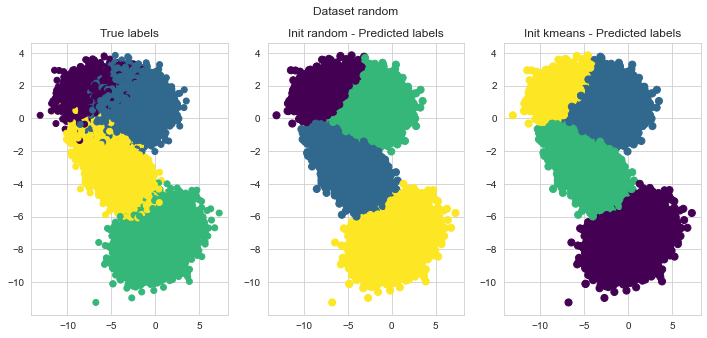

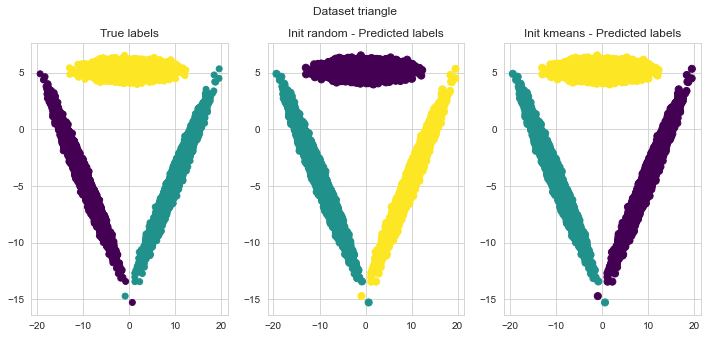

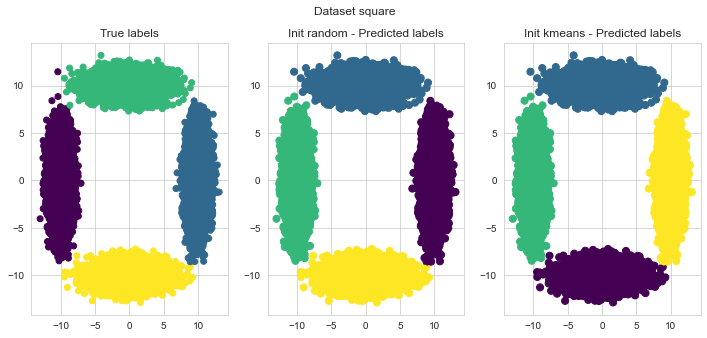

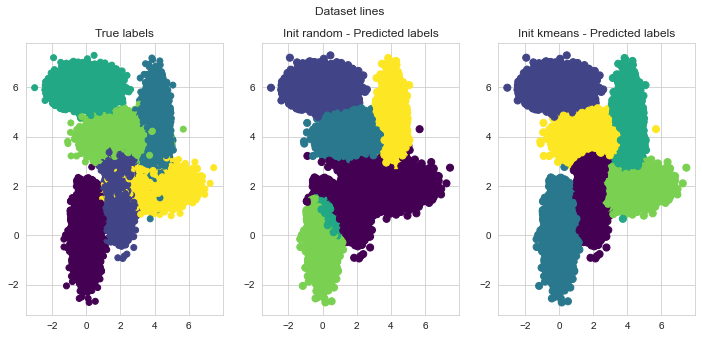

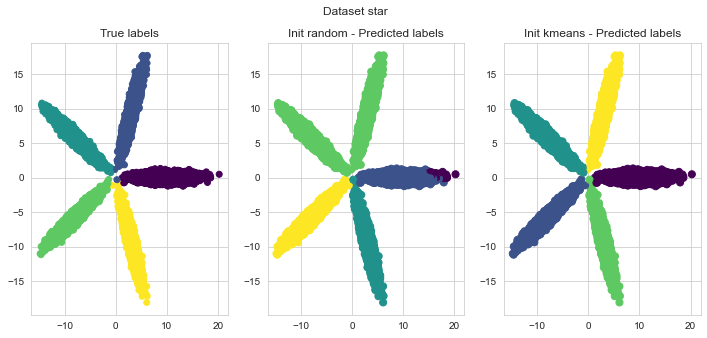

In [20]:
for dataset_name in train_predictions.keys():
    init_method = list(train_predictions[dataset_name].keys())
    fig, axs = plt.subplots(1, 1 + len(init_method), figsize=(12,5))
    dataset = pd.read_csv(f"dataset_{dataset_name}.csv")
    feat0 = dataset["feature_0"]
    feat1 = dataset["feature_1"]
    axs[0].scatter(feat0, feat1, c=train_gt[dataset_name], cmap='viridis')
    axs[0].set_title("True labels")
    for i, method in enumerate(init_method, 1):
        axs[i].scatter(feat0, feat1, c=train_predictions[dataset_name][method], s=50, cmap='viridis')
        axs[i].set_title(f"Init {method} - Predicted labels")
    fig.suptitle(f'Dataset {dataset_name}')
    plt.show()

### Evaluating the model

In [ ]:
def single_linkage(D_i, D_j):
    return np.min(np.linalg.norm(D_i[:, np.newaxis] - D_j, axis=2))

def complete_linkage(D_i, D_j):
    return np.max(np.linalg.norm(D_i[:, np.newaxis] - D_j, axis=2))

def average_linkage(D_i, D_j):
    n_i, n_j = len(D_i), len(D_j)
    return np.sum(np.linalg.norm(D_i[:, np.newaxis] - D_j, axis=2)) / (n_i * n_j)

def centroid_linkage(D_i, D_j):
    m_i, m_j = np.mean(D_i, axis=0), np.mean(D_j, axis=0)
    return np.linalg.norm(m_i - m_j)

def wards_method(D_i, D_j):
    n_i, n_j = len(D_i), len(D_j)
    m_i, m_j = np.mean(D_i, axis=0), np.mean(D_j, axis=0)
    return np.sqrt((n_i * n_j) / (n_i + n_j)) * np.linalg.norm(m_i - m_j)

#TODO: what is the last method?

In [28]:
# # Choosing y_pred values from the iteration we did:
# i = input("Choose an index of the prediction to use for the evaluation: ")
# y_test_pred = test_predictions[int(i)-1]
# fig = plt.figure(figsize=(10,10))
# ax1 = fig.add_subplot(1, 2, 1, projection='3d')
# ax1.scatter(X_test[:, 0], X_test[:, 1], X_test[:, 2], c=y_test_pred, s=50, cmap='viridis')
# ax1.set_title(f'Predicted labels for GMM {i}')
# ax2 = fig.add_subplot(1, 2, 2, projection='3d')
# ax2.scatter(X_test[:, 0], X_test[:, 1], X_test[:, 2], c=y_test, s=50, cmap='viridis')
# ax2.set_title(f'Original Labels')
# plt.show()


In [29]:
# # Separate the data into clusters based on the true and predicted labels
# clusters_true = [X_test[y_test == i] for i in np.unique(y_test)]
# clusters_pred = [X_test[y_test_pred == i] for i in np.unique(y_test_pred)]
#
# # Make sure that the number of clusters is the same in the true and predicted labels
# assert len(clusters_true) == len(clusters_pred), "Number of clusters in y_test and y_pred must be the same"
#
# # Initialize the DataFrame
# distances_df = pd.DataFrame(columns=['Cluster Pair', 'Single Linkage', 'Complete Linkage', 'Average Linkage', 'Centroid Linkage', "Ward's Method"])
#
# # Calculate the distance between each pair of corresponding clusters
# for i in range(len(clusters_true)):
#     D_i_true = clusters_true[i]
#     D_j_pred = clusters_pred[i]
#
#     # Calculate the distances
#     single = single_linkage(D_i_true, D_j_pred)
#     complete = complete_linkage(D_i_true, D_j_pred)
#     average = average_linkage(D_i_true, D_j_pred)
#     centroid = centroid_linkage(D_i_true, D_j_pred)
#     ward = wards_method(D_i_true, D_j_pred)
#
#     # Add the results to the DataFrame
#     distances_df.loc[i] = [f"Cluster Pair {i+1}", single, complete, average, centroid, ward]

In [30]:
# distances_df

# Assignment #2

In [84]:
class UOFC:
    def __init__(self, n_clusters, init_method='random'):
        self.n_clusters = n_clusters
        self.init_method = init_method
        self.prototypes = None
        self.max_iter = 1000

    def _init_prototypes(self, data):
        if self.init_method == 'random':
            # Initialize prototypes randomly from the data points
            prototypes = data[np.random.choice(data.shape[0], self.n_clusters, replace=False), :]
        elif self.init_method == 'kmeans':
            # Initialize prototypes using K-means
            prototypes = self._kmeans(data)
        else:
            raise ValueError(f"Unknown init_method: {self.init_method}")
        return prototypes

    def _kmeans(self, data):
        # Initialize prototypes randomly from the data points
        prototypes = data[np.random.choice(data.shape[0], self.n_clusters, replace=False), :]

        for i in tqdm(range(self.max_iter)):
            # Compute distances from data points to prototypes
            distances = self._cdist(data, prototypes)

            # Assign each data point to the closest prototype
            labels = np.argmin(distances, axis=1)

            # Compute new prototypes as the mean of the data points assigned to each prototype
            new_prototypes = np.array([data[labels == i].mean(axis=0) for i in range(self.n_clusters)])

            # Check for convergence
            if np.allclose(prototypes, new_prototypes, atol=1e-2, rtol=1e-2):
                break

            prototypes = new_prototypes

        return prototypes

    def _cdist(self, X, Y):
        # Compute pairwise distances between rows in X and Y
        return np.sqrt(((X[:, np.newaxis] - Y) ** 2).sum(axis=2))

    def _memberships(self, data, prototypes=None):
        if prototypes is None:
            prototypes = self.prototypes
        # Compute memberships for each data point to each cluster
        distances = self._cdist(data, prototypes)
        m = np.clip(1 / distances, a_min=-1, a_max=10000)
        m = m / m.sum(axis=1)[:, None]
        return m

    def fit(self, data, max_iter=1000):
        self.max_iter = max_iter
        # Initialize classification prototypes
        self.prototypes = self._init_prototypes(data)

        for i in tqdm(range(self.max_iter)):
            # Step 1: Cluster data using fuzzy K-means with current prototypes
            # Compute memberships for each data point to each cluster
            memberships = self._memberships(data)

            # Step 2: Refine prototypes using fuzzy maximum likelihood estimation
            new_prototypes = np.dot(memberships.T, data) / memberships.sum(axis=0, keepdims=True).T

            # Check for convergence
            if np.allclose(self.prototypes, new_prototypes, atol=1e-2, rtol=1e-2):
                break

            self.prototypes = new_prototypes

    def predict(self, data):
        # Assign each data point to the cluster with the highest membership
        memberships = self._memberships(data)
        return np.argmax(memberships, axis=1)


### Fitting the model

In [86]:
train_predictions = {}
train_gt = {}

init_methods = ['random', 'kmeans']
datasets = ['random', 'triangle', 'square', 'lines', 'star']
num_of_groups = [2, 3, 4, 5, 6, 7]

for dataset_name in datasets:
    print('=' * 50)
    print("Working on dataset: ", dataset_name)
    dataset = pd.read_csv(f"dataset_{dataset_name}.csv")
    X_train, y_train = split_dataset(dataset, test_size=0)

    train_predictions[dataset_name] = {method: {} for method in init_methods}
    train_gt[dataset_name] = y_train
    for init_method in init_methods:  # number of times to fit the model
        print('-'* 25)
        for n_groups in num_of_groups:  # number of clusters
            print("Fitting model with init_method: ", init_method, " and n_groups: ", n_groups)
            uofc = UOFC(n_clusters=n_groups, init_method=init_method)  # Initialize the UOFC
            uofc.fit(X_train)
            y_train_pred = uofc.predict(X_train)
            train_predictions[dataset_name][init_method][n_groups] = {'y_pred': y_train_pred, 'model': uofc}


Working on dataset:  random
-------------------------
Fitting model with init_method:  random  and n_groups:  2


  0%|          | 0/1000 [00:00<?, ?it/s]/var/folders/hh/w7dldxz508v5y8x432ngc6t80000gn/T/ipykernel_53414/2652529570.py:50: RuntimeWarning: divide by zero encountered in true_divide
  m = np.clip(1 / distances, a_min=-1, a_max=10000)
  2%|▏         | 18/1000 [00:00<00:06, 154.61it/s]


Fitting model with init_method:  random  and n_groups:  3


  2%|▏         | 21/1000 [00:00<00:08, 109.64it/s]


Fitting model with init_method:  random  and n_groups:  4


  2%|▏         | 16/1000 [00:00<00:12, 79.66it/s]


Fitting model with init_method:  random  and n_groups:  5


  2%|▏         | 24/1000 [00:00<00:16, 60.18it/s]


Fitting model with init_method:  random  and n_groups:  6


  2%|▏         | 21/1000 [00:00<00:22, 44.31it/s]


Fitting model with init_method:  random  and n_groups:  7


  2%|▏         | 24/1000 [00:00<00:24, 39.89it/s]


-------------------------
Fitting model with init_method:  kmeans  and n_groups:  2


  2%|▏         | 17/1000 [00:00<00:08, 121.51it/s]


Fitting model with init_method:  kmeans  and n_groups:  3


  2%|▏         | 21/1000 [00:00<00:10, 96.37it/s] 


Fitting model with init_method:  kmeans  and n_groups:  4


  2%|▏         | 23/1000 [00:00<00:13, 71.11it/s]


Fitting model with init_method:  kmeans  and n_groups:  5


  2%|▏         | 24/1000 [00:00<00:15, 62.27it/s]


Fitting model with init_method:  kmeans  and n_groups:  6


  2%|▏         | 24/1000 [00:00<00:24, 39.42it/s]


Fitting model with init_method:  kmeans  and n_groups:  7


  3%|▎         | 26/1000 [00:00<00:22, 42.36it/s]


Working on dataset:  triangle
-------------------------
Fitting model with init_method:  random  and n_groups:  2


  0%|          | 0/1000 [00:00<?, ?it/s]/var/folders/hh/w7dldxz508v5y8x432ngc6t80000gn/T/ipykernel_53414/2652529570.py:50: RuntimeWarning: divide by zero encountered in true_divide
  m = np.clip(1 / distances, a_min=-1, a_max=10000)
  1%|          | 8/1000 [00:00<00:04, 247.89it/s]


Fitting model with init_method:  random  and n_groups:  3


  1%|▏         | 13/1000 [00:00<00:08, 122.65it/s]


Fitting model with init_method:  random  and n_groups:  4


  1%|▏         | 13/1000 [00:00<00:10, 90.09it/s]


Fitting model with init_method:  random  and n_groups:  5


  1%|▏         | 13/1000 [00:00<00:16, 60.10it/s]


Fitting model with init_method:  random  and n_groups:  6


  1%|▏         | 14/1000 [00:00<00:22, 44.66it/s]


Fitting model with init_method:  random  and n_groups:  7


  2%|▏         | 15/1000 [00:00<00:23, 41.64it/s]


-------------------------
Fitting model with init_method:  kmeans  and n_groups:  2


  1%|          | 12/1000 [00:00<00:04, 220.04it/s]


Fitting model with init_method:  kmeans  and n_groups:  3


  1%|▏         | 14/1000 [00:00<00:08, 111.09it/s]


Fitting model with init_method:  kmeans  and n_groups:  4


  1%|▏         | 14/1000 [00:00<00:14, 67.42it/s]


Fitting model with init_method:  kmeans  and n_groups:  5


  2%|▏         | 15/1000 [00:00<00:21, 45.83it/s]


Fitting model with init_method:  kmeans  and n_groups:  6


  1%|▏         | 14/1000 [00:00<00:19, 49.78it/s]


Fitting model with init_method:  kmeans  and n_groups:  7


  2%|▏         | 15/1000 [00:00<00:22, 43.37it/s]


Working on dataset:  square
-------------------------
Fitting model with init_method:  random  and n_groups:  2


  0%|          | 0/1000 [00:00<?, ?it/s]/var/folders/hh/w7dldxz508v5y8x432ngc6t80000gn/T/ipykernel_53414/2652529570.py:50: RuntimeWarning: divide by zero encountered in true_divide
  m = np.clip(1 / distances, a_min=-1, a_max=10000)
  1%|          | 9/1000 [00:00<00:07, 136.84it/s]


Fitting model with init_method:  random  and n_groups:  3


  1%|          | 10/1000 [00:00<00:10, 97.85it/s]


Fitting model with init_method:  random  and n_groups:  4


  1%|          | 9/1000 [00:00<00:17, 55.15it/s]


Fitting model with init_method:  random  and n_groups:  5


  1%|          | 10/1000 [00:00<00:18, 53.14it/s]


Fitting model with init_method:  random  and n_groups:  6


  1%|          | 10/1000 [00:00<00:22, 43.77it/s]


Fitting model with init_method:  random  and n_groups:  7


  1%|          | 10/1000 [00:00<00:25, 38.19it/s]


-------------------------
Fitting model with init_method:  kmeans  and n_groups:  2


  1%|          | 8/1000 [00:00<00:07, 141.33it/s]


Fitting model with init_method:  kmeans  and n_groups:  3


  1%|          | 9/1000 [00:00<00:05, 169.98it/s]


Fitting model with init_method:  kmeans  and n_groups:  4


  1%|          | 10/1000 [00:00<00:13, 71.09it/s]


Fitting model with init_method:  kmeans  and n_groups:  5


  1%|          | 11/1000 [00:00<00:19, 51.37it/s]


Fitting model with init_method:  kmeans  and n_groups:  6


  1%|          | 11/1000 [00:00<00:23, 42.49it/s]


Fitting model with init_method:  kmeans  and n_groups:  7


  1%|          | 11/1000 [00:00<00:26, 37.32it/s]


Working on dataset:  lines
-------------------------
Fitting model with init_method:  random  and n_groups:  2


  0%|          | 0/1000 [00:00<?, ?it/s]/var/folders/hh/w7dldxz508v5y8x432ngc6t80000gn/T/ipykernel_53414/2652529570.py:50: RuntimeWarning: divide by zero encountered in true_divide
  m = np.clip(1 / distances, a_min=-1, a_max=10000)
  0%|          | 2/1000 [00:00<00:16, 60.63it/s]


Fitting model with init_method:  random  and n_groups:  3


  0%|          | 4/1000 [00:00<00:16, 60.30it/s]


Fitting model with init_method:  random  and n_groups:  4


  0%|          | 5/1000 [00:00<00:15, 65.64it/s]


Fitting model with init_method:  random  and n_groups:  5


  1%|          | 6/1000 [00:00<00:15, 63.39it/s]


Fitting model with init_method:  random  and n_groups:  6


  0%|          | 5/1000 [00:00<00:22, 44.38it/s]


Fitting model with init_method:  random  and n_groups:  7


  1%|          | 7/1000 [00:00<00:26, 37.65it/s]


-------------------------
Fitting model with init_method:  kmeans  and n_groups:  2


  0%|          | 5/1000 [00:00<00:10, 95.84it/s]


Fitting model with init_method:  kmeans  and n_groups:  3


  1%|          | 6/1000 [00:00<00:08, 113.62it/s]


Fitting model with init_method:  kmeans  and n_groups:  4


  1%|          | 6/1000 [00:00<00:10, 92.02it/s]


Fitting model with init_method:  kmeans  and n_groups:  5


  1%|          | 7/1000 [00:00<00:11, 83.16it/s]


Fitting model with init_method:  kmeans  and n_groups:  6


  1%|          | 7/1000 [00:00<00:23, 42.04it/s]


Fitting model with init_method:  kmeans  and n_groups:  7


  1%|          | 7/1000 [00:00<00:23, 43.11it/s]


Working on dataset:  star
-------------------------
Fitting model with init_method:  random  and n_groups:  2


  0%|          | 0/1000 [00:00<?, ?it/s]/var/folders/hh/w7dldxz508v5y8x432ngc6t80000gn/T/ipykernel_53414/2652529570.py:50: RuntimeWarning: divide by zero encountered in true_divide
  m = np.clip(1 / distances, a_min=-1, a_max=10000)
  1%|          | 7/1000 [00:00<00:07, 125.18it/s]


Fitting model with init_method:  random  and n_groups:  3


  1%|          | 9/1000 [00:00<00:10, 97.85it/s]


Fitting model with init_method:  random  and n_groups:  4


  1%|          | 9/1000 [00:00<00:17, 57.07it/s]


Fitting model with init_method:  random  and n_groups:  5


  1%|          | 9/1000 [00:00<00:17, 56.09it/s]


Fitting model with init_method:  random  and n_groups:  6


  1%|          | 10/1000 [00:00<00:20, 48.28it/s]


Fitting model with init_method:  random  and n_groups:  7


  1%|          | 10/1000 [00:00<00:24, 41.18it/s]


-------------------------
Fitting model with init_method:  kmeans  and n_groups:  2


  1%|          | 8/1000 [00:00<00:06, 153.23it/s]


Fitting model with init_method:  kmeans  and n_groups:  3


  1%|          | 9/1000 [00:00<00:05, 177.04it/s]


Fitting model with init_method:  kmeans  and n_groups:  4


  1%|          | 10/1000 [00:00<00:13, 71.21it/s]


Fitting model with init_method:  kmeans  and n_groups:  5


  1%|          | 10/1000 [00:00<00:13, 76.09it/s]


Fitting model with init_method:  kmeans  and n_groups:  6


  1%|          | 11/1000 [00:00<00:22, 44.84it/s]


Fitting model with init_method:  kmeans  and n_groups:  7


  1%|          | 10/1000 [00:00<00:23, 41.75it/s]


### Visualizing the results

In [ ]:
for dataset_name in train_predictions.keys():
    init_methods = list(train_predictions[dataset_name].keys())
    dataset = pd.read_csv(f"dataset_{dataset_name}.csv")
    feat0 = dataset["feature_0"]
    feat1 = dataset["feature_1"]
    n_groups = list(train_predictions[dataset_name][init_methods[0]].keys())
    for method in init_methods:
        fig, axs = plt.subplots(1, 1 + len(n_groups), figsize=(22,4))
        axs[0].scatter(feat0, feat1, c=train_gt[dataset_name], cmap='viridis')
        axs[0].set_title("True labels")
        for i, n_group in enumerate(n_groups, 1):
            axs[i].scatter(feat0, feat1, c=train_predictions[dataset_name][method][n_group]['y_pred'], s=50, cmap='tab20')
            axs[i].set_title(f"Predicted labels\nInit {method} | {n_group} Clusters - ")
        fig.suptitle(f'Dataset {dataset_name}', y=1.1)
        plt.show()


### Evaluating the results by 6 criteria

In [92]:
method = 'random'
dataset_name = 'random'
n_groups = 3

X = pd.read_csv(f"dataset_{dataset_name}.csv")
X = X[X.columns.drop('label')]
y_pred = train_predictions[dataset_name][method][n_groups]['y_pred']
uofc = train_predictions[dataset_name][method][n_groups]['model']


In [93]:
X.shape

(100000, 2)

In [94]:
y_pred.shape

(100000,)

In [112]:
prototypes = uofc.prototypes
prototypes.shape

(3, 2)

In [113]:
memberships = uofc._memberships(X.values)
memberships.shape

(100000, 3)

In [128]:
prototypes - X.values[:, None]

array([[[-1.84603623,  4.87840313],
        [-2.08128179,  5.02371148],
        [-1.80275893,  4.85159949]],

       [[-3.74033454, -0.69562437],
        [-3.9755801 , -0.55031602],
        [-3.69705724, -0.72242802]],

       [[ 4.34030599, -4.5166241 ],
        [ 4.10506043, -4.37131575],
        [ 4.38358329, -4.54342774]],

       ...,

       [[-3.98169388,  0.01806288],
        [-4.21693944,  0.16337124],
        [-3.93841658, -0.00874076]],

       [[-4.58167034, -0.35230034],
        [-4.81691591, -0.20699199],
        [-4.53839304, -0.37910398]],

       [[ 8.23579869, -4.2553519 ],
        [ 8.00055313, -4.11004354],
        [ 8.27907599, -4.28215554]]])

In [ ]:
k = 0
(prototypes[k] - X.values) @ (prototypes[k] - X.values).T


In [123]:
F = memberships[:, None] * ((prototypes - X.values[:, None]) * (prototypes - X.values[:, None]).T )

ValueError: operands could not be broadcast together with shapes (100000,3,2) (2,3,100000) 

In [ ]:
def fuzzy_hypercube_criteria(X, y_pred):
    K = np.unique(y_pred).shape[0]  # Number of clusters
    V_HV = 0  # Initialize hypervolume
    for k in range(K):
        # Select data points in kth cluster
        X_k = X[y_pred == k]
        # Compute covariance matrix
        F_k = np.cov(X_k, rowvar=False)
        # Compute hypervolume of kth cluster
        h_k = np.sqrt(np.linalg.det(F_k))
        # Add to total hypervolume
        V_HV += h_k
    return V_HV

def partition_density_criteria(X, y_pred, memberships):
    K = np.unique(y_pred).shape[0]  # Number of clusters
    V_PD = 0  # Initialize partition density
    h_sum = 0  # Initialize sum of hypervolumes
    for k in range(K):
        # Select data points in kth cluster
        X_k = X[y_pred == k]
        # Compute covariance matrix and its inverse
        F_k = np.cov(X_k, rowvar=False)
        G_k = np.linalg.inv(F_k)
        # Compute centroid of kth cluster
        p_k = X_k.mean(axis=0)
        # Compute memberships of "central members"
        I_k = ((X_k - p_k) @ G_k * (p_k - X_k)).sum(axis=1) < 1
        C_k = memberships[y_pred == k][I_k].sum()
        # Compute hypervolume of kth cluster
        h_k = np.sqrt(np.linalg.det(F_k))
        # Add to total partition density and sum of hypervolumes
        V_PD += C_k
        h_sum += h_k
    return V_PD / h_sum

def average_partition_density_central_members_criteria(X, y_pred, memberships):
    K = np.unique(y_pred).shape[0]  # Number of clusters
    V_AD = 0  # Initialize average partition density
    for k in range(K):
        # Select data points in kth cluster
        X_k = X[y_pred == k]
        # Compute covariance matrix and its inverse
        F_k = np.cov(X_k, rowvar=False)
        G_k = np.linalg.inv(F_k)
        # Compute centroid of kth cluster
        p_k = X_k.mean(axis=0)
        # Compute memberships of "central members"
        I_k = ((X_k - p_k) @ G_k * (p_k - X_k)).sum(axis=1) < 1
        C_k = memberships[y_pred == k][I_k].sum()
        # Compute hypervolume of kth cluster
        h_k = np.sqrt(np.linalg.det(F_k))
        # Add to total average partition density
        V_AD += C_k / h_k
    return V_AD / K

# def average_partition_density_maximal_members_criteria(X, y, y_pred):
#
# def normalized_by_k_partition_indexes_criteria(X, y, y_pred):
#
# def invariant_criteria(X, y, y_pred):

### Evaluating the results by 6 criteria

In [ ]:
def fuzzy_hypercube_criteria(X, y_pred):
    K = np.unique(y_pred).shape[0]  # Number of clusters
    V_HV = 0  # Initialize hypervolume
    for k in range(K):
        # Select data points in kth cluster
        X_k = X[y_pred == k]
        # Compute covariance matrix
        F_k = np.cov(X_k, rowvar=False)
        # Compute hypervolume of kth cluster
        h_k = np.sqrt(np.linalg.det(F_k))
        # Add to total hypervolume
        V_HV += h_k
    return V_HV

def partition_density_criteria(X, y_pred, memberships):
    K = np.unique(y_pred).shape[0]  # Number of clusters
    V_PD = 0  # Initialize partition density
    h_sum = 0  # Initialize sum of hypervolumes
    for k in range(K):
        # Select data points in kth cluster
        X_k = X[y_pred == k]
        # Compute covariance matrix and its inverse
        F_k = np.cov(X_k, rowvar=False)
        G_k = np.linalg.inv(F_k)
        # Compute centroid of kth cluster
        p_k = X_k.mean(axis=0)
        # Compute memberships of "central members"
        I_k = ((X_k - p_k) @ G_k * (p_k - X_k)).sum(axis=1) < 1
        C_k = memberships[y_pred == k][I_k].sum()
        # Compute hypervolume of kth cluster
        h_k = np.sqrt(np.linalg.det(F_k))
        # Add to total partition density and sum of hypervolumes
        V_PD += C_k
        h_sum += h_k
    return V_PD / h_sum

def average_partition_density_central_members_criteria(X, y_pred, memberships):
    K = np.unique(y_pred).shape[0]  # Number of clusters
    V_AD = 0  # Initialize average partition density
    for k in range(K):
        # Select data points in kth cluster
        X_k = X[y_pred == k]
        # Compute covariance matrix and its inverse
        F_k = np.cov(X_k, rowvar=False)
        G_k = np.linalg.inv(F_k)
        # Compute centroid of kth cluster
        p_k = X_k.mean(axis=0)
        # Compute memberships of "central members"
        I_k = ((X_k - p_k) @ G_k * (p_k - X_k)).sum(axis=1) < 1
        C_k = memberships[y_pred == k][I_k].sum()
        # Compute hypervolume of kth cluster
        h_k = np.sqrt(np.linalg.det(F_k))
        # Add to total average partition density
        V_AD += C_k / h_k
    return V_AD / K

def average_partition_density_maximal_members_criteria(X, y, y_pred):

def normalized_by_k_partition_indexes_criteria(X, y, y_pred):

def invariant_criteria(X, y, y_pred):